In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("weight-height.csv")

# Scatter plot

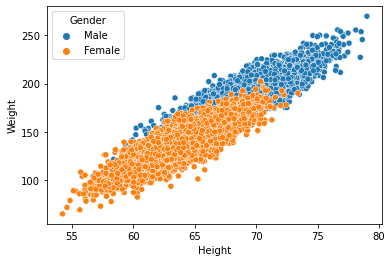

In [3]:
sns.scatterplot(x=df['Height'], y=df['Weight'], hue=df['Gender'])
plt.show()

 One hot encoding

In [4]:
x= pd.get_dummies(df["Gender"])
df_new=pd.concat([df.loc[:,["Height","Weight"]],x],axis=1)
df_new

,Height,Weight,Female,Male
0,73.847017,241.893563,0,1
1,68.781904,162.310473,0,1
2,74.110105,NaN,0,1
3,71.730978,NaN,0,1
4,69.881796,NaN,0,1
...,...,...,...,...
9995,66.172652,136.777454,0,0
9996,67.067155,170.867906,0,0
9997,63.867992,128.475319,1,0
9998,69.034243,163.852461,1,0


after doing one hot encoding we have 4 predictors

# Standardization 

In [5]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,NaN
3,Male,71.730978,NaN
4,Male,69.881796,NaN


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
model = scaler.fit(df.iloc[:, 1:3])
standerdized_data = model.transform(df.iloc[:, 1:3])
 
print("Standerdized data of real value predictors")
standerdized_data

Standerdized data of real value predictors


array([[ 1.94094975,  2.51316968],
       [ 0.62515354,  0.0321973 ],
       [ 2.00929386,         nan],
       ...,
       [-0.6513642 , -1.02260066],
       [ 0.69070525,  0.08026821],
       [-1.15110786, -1.48480227]])

 scatter plots of the transformed data

In [7]:
df2=pd.DataFrame(standerdized_data,columns=["standerdized_height", "standerdized_weight"])
df2

,standerdized_height,standerdized_weight
0,1.940950,2.513170
1,0.625154,0.032197
2,2.009294,NaN
3,1.391253,NaN
4,0.910879,NaN
...,...,...
9995,-0.052668,-0.763785
9996,0.179702,0.298972
9997,-0.651364,-1.022601
9998,0.690705,0.080268


Text(0, 0.5, 'Weight')

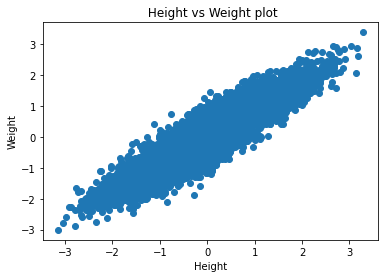

In [8]:


fig, ax = plt.subplots()

ax.scatter(df2["standerdized_height"], df2["standerdized_weight"])
ax.set_title(" Height vs Weight plot")
ax.set_xlabel("Height")
ax.set_ylabel("Weight")

Observation: After standardization, the data decomes mean centeric and standard deviation of the data becomes 1.

 Heatmap

<AxesSubplot:>

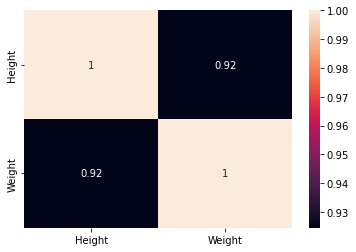

In [9]:
sns.heatmap(df[['Height', 'Weight']].corr(), annot=True)

 missing value 

In [10]:
df1=df.copy()

In [11]:
# For Gender column

df1['Gender'].mode()

0    Female
Name: Gender, dtype: object

In [12]:
df1["Gender"].fillna("Female",inplace=True)

In [13]:
# For Height column
H =df1['Height'].groupby(df1['Gender']).median().to_dict()

for i in H.keys():
    s = df1[ (df1['Height'].isnull()) & (df1['Gender']==i) ]
    df1['Height'][s.index] = H[i]

In [14]:
# For Weight column
W =df1['Weight'].groupby(df1['Gender']).median().to_dict()

for i in W.keys():
    s = df1[ (df1['Weight'].isnull()) & (df1['Gender']==i) ]
    df1['Weight'][s.index] = W[i]

In [15]:
df1

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,186.947981
3,Male,71.730978,186.947981
4,Male,69.881796,186.947981
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [16]:
df1.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

 Skewness

<AxesSubplot:title={'center':'Distribution of [Height] column : '}, xlabel='Height', ylabel='Density'>

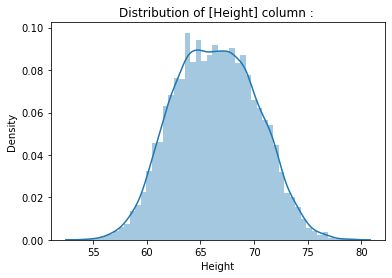

In [17]:
plt.title('Distribution of [Height] column : ')
sns.distplot(df1["Height"])

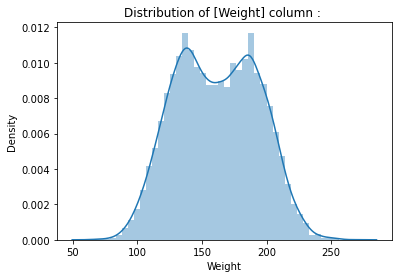

In [18]:
plt.title('Distribution of [Weight] column : ')
sns.distplot(df1['Weight'])
plt.show()

In [19]:
print('Skewness of [Height] columns : ', end='')
print(df1['Height'].skew())
print('')
print('Skewness of [Weight] columns : ', end='')
print(df1['Weight'].skew())

Skewness of [Height] columns : 0.05033366723088522

Skewness of [Weight] columns : 0.02772438820085638


Observation: Since, the Skewness of the variables lies between -0.5 to +0.5 So, the data is Normally Distributed and no further transformation will be require.

outliers detection

In [20]:
upper_limit = df.Height.mean() + 3*df.Height.std()
lower_limit = df.Height.mean() - 3*df.Height.std()
upper_limit, lower_limit

(77.92437667588679, 54.82641661174189)

In [21]:
df[(df.Height>upper_limit) | (df.Height<lower_limit)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989698
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [22]:
df_no_outlier_std_dev = df[(df.Height<upper_limit) & (df.Height>lower_limit)]
print("Dataframe with no Outlier")
df_no_outlier_std_dev

Dataframe with no Outlier


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,NaN
3,Male,71.730978,NaN
4,Male,69.881796,NaN
...,...,...,...
9995,NaN,66.172652,136.777454
9996,NaN,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


for weight

In [23]:
upper_limit = df.Weight.mean() + 3*df.Weight.std()
lower_limit = df.Weight.mean() - 3*df.Weight.std()

In [24]:
df[(df.Weight>upper_limit) | (df.Weight<lower_limit)]["Weight"]

2014    269.989698
9285     64.700127
Name: Weight, dtype: float64

In [25]:
df_no_outlier_height = df[(df.Height>lower_limit)&(df.Height<upper_limit)]
print("data frame after removing of outlier")
df_no_outlier_height

data frame after removing of outlier


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,NaN
3,Male,71.730978,NaN
4,Male,69.881796,NaN
...,...,...,...
9985,NaN,68.041065,170.514213
9987,NaN,65.610243,151.169475
9995,NaN,66.172652,136.777454
9996,NaN,67.067155,170.867906


# Equal width bins

In [26]:

_,bins=np.histogram(df1["Height"],3)
#equal width

In [27]:
bins

array([54.26313333, 62.50833634, 70.75353934, 78.99874235])

In [28]:
df1["equal_width_bin"]="short"

for i in range(len(bins)-1):
    if i==0:
        df1.loc[(df1["Height"]>=bins[i]) & (df1["Height"]<bins[i+1]), "equal_width_col"]="Short"
    elif i==1:
        df1.loc[(df1["Height"]>=bins[i]) & (df1["Height"]<bins[i+1]), "equal_width_col"]="Medium"
    elif i==2:
        df1.loc[(df1["Height"]>=bins[i]) & (df1["Height"]<=bins[i+1]), "equal_width_col"]="Tall"
        

In [29]:
df1

,Gender,Height,Weight,equal_width_bin,equal_width_col
0,Male,73.847017,241.893563,short,Tall
1,Male,68.781904,162.310473,short,Medium
2,Male,74.110105,186.947981,short,Tall
3,Male,71.730978,186.947981,short,Tall
4,Male,69.881796,186.947981,short,Medium
...,...,...,...,...,...
9995,Female,66.172652,136.777454,short,Medium
9996,Female,67.067155,170.867906,short,Medium
9997,Female,63.867992,128.475319,short,Medium
9998,Female,69.034243,163.852461,short,Medium
